In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from os.path import exists, dirname
import os, sys
import numpy as np
import seaborn as sns
import json
from dreem_nap import database, utils
from dreem_nap.study import Study
import yaml

### Configuration
- Load config file and check what's in it
- Configurate the Notebook

In [2]:
with open('../config.yml', 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
for k,v in cfg.items():
    print(k,(30-len(k))*'_',v)

mpl.rcParams['figure.dpi'] = cfg['mpl_rcParams_figure_dpi'] # the highest the resolution, the slowest the plotting
mpl.rcParams["figure.figsize"] = cfg['mpl_rcParams_figure_figsize'] # (width, height) in inches

path __________________________ /Users/ymdt/src/dreem_nap/data/
path_to_data __________________ /Users/ymdt/src/dreem_nap/data/DEMULTIPLEXED
firebase_credentials_file _____ /Users/ymdt/src/dreem_nap/data/credentials_firebase.json
path_to_studies _______________ /Users/ymdt/src/dreem_nap/data/DEMULTIPLEXED/samples.csv
min_cov_bases _________________ 10
mpl_rcParams_figure_dpi _______ 600
mpl_rcParams_figure_figsize ___ [15, 7]


### Create and load dataframe of a single study as a demo

In [3]:
# Create a study
salt = Study().from_dict({'name': 'salt',
                         'description': 'Change the Na concentration', 
                         'samples': ['A6', 'B6', 'C6', 'D6', 'E6'], 
                         'title': 'Na quantity [M]', 
                         'conditions': [0.15, 0.3, 0.6, 1.0, 1.2]})

# Load data
salt.load_df_from_local_files(path_to_data= cfg['path_to_data'], 
                              min_cov_bases= cfg['min_cov_bases'])

# Show the dataframe
salt.df.head()

299 constructs found across all samples for study salt.


,samp,construct,sequence,structure,data_type,num_reads,num_aligned,num_of_mutations,mut_bases,info_bases,...,start,end,skips_low_mapq,skips_short_read,skips_too_many_muts,mod_bases_A,mod_bases_C,mod_bases_G,mod_bases_T,min_cov_bases
0,A6,7695,GACGTTCCTGGATCCTGCATCGAATCTTGATCATATATCTACATCT...,None,DMS,4017,3424,"[1982, 846, 455, 113, 16, 6, 4, 0, 1, 0, 1, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 3230.0, 3234.0, 3235.0, 3238.0, 3240.0, ...",...,1,170,593,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",148.0
1,A6,2069,GACGTTCCTGGATCCATTGTATATGTCCTTTTTCTCTTCCTCTTTC...,None,DMS,16059,15518,"[5144, 3790, 4658, 1248, 314, 146, 87, 44, 53,...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 3.0, ...","[0.0, 15467.0, 15477.0, 15490.0, 15500.0, 1550...",...,1,170,517,0,24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, ...",6034.0
2,A6,381,GACGTTCCTGGATCCATTCGATCCAAACACACCCACACTCACACAC...,None,DMS,32688,15403,"[4148, 5279, 3408, 1288, 685, 292, 109, 73, 54...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, ...","[0.0, 15344.0, 15350.0, 15365.0, 15377.0, 1538...",...,1,170,17228,0,57,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, ...",505.0
4,A6,3899,GACGTTCCTGGATCCGCATTCTAAGATTCTTTCTCTTTCTCTTTCT...,None,DMS,2050,1164,"[759, 241, 104, 18, 11, 4, 2, 1, 7, 8, 9, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1159.0, 1159.0, 1160.0, 1162.0, 1163.0, ...",...,1,170,868,0,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",153.0
5,A6,1655,GACGTTCCTGGATCCTTTAGTCTCTTCTTCCTCTTTCTCTTTCTCT...,None,DMS,30389,3239,"[358, 281, 700, 1740, 60, 38, 12, 18, 18, 8, 6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 2609.0, 2612.0, 2612.0, 2612.0, 2613.0, ...",...,1,170,27135,0,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.0


### Plot this study with different plots
Check out the list of plots in the plot module

<AxesSubplot:title={'center':'sample A6, construct 7695'}, xlabel='index'>

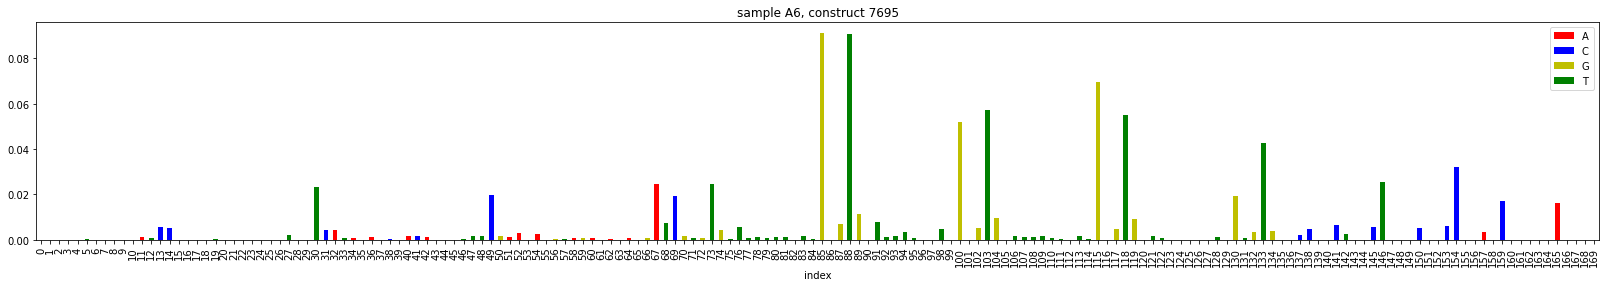

In [9]:
salt.mut_histogram(samp='A6', construct='7695',\
             plot_type='index', figsize=(28,4))

In [ ]:
salt.deltaG(samp='A6',bases_type=['A','C'], roi_range='all')  # currently bugged due to DREEM, work in progress

In [ ]:
salt.heatmap(column='min_cov_bases') # shows a heatmap of the minimum base coverage across all samples

In [ ]:
# currently bugged due to DREEM, work in progress
salt.mut_rate_vs_base_non_pairing_prob(samp='A6', construct='7695') # shows the mutation rate vs base non-pairing probability

In [ ]:
salt.deltaG_basewise(samp='A6', roi_range=[40,63,78,94])

In [11]:
salt.study_base(construct='9572', structure='full',
                roi_range=[40,63,78,94])

TypeError: 'NoneType' object is not iterable

### You can load every study from a file using Study.load_studies()

In [ ]:
studies = Study.load_studies(cfg['path_to_studies'])
for name, study in studies.items():
    study.load_df_from_local_files(path_to_data= cfg['path_to_data'], min_cov_bases= cfg['min_cov_bases'])

### Studies can be called from the dictionary using their name

In [ ]:
studies['temperature'].mut_histogram(studies['temperature'].samples[0], '9572', 'index')